In [1]:
import os, sys, time, resource, re, gc, shutil, math

import django

import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from tmv_app.tasks import *

In [3]:
run_id = 1862
s = RunStats.objects.get(pk=1862)

print(dict(s.__dict__))

{'_state': <django.db.models.base.ModelState object at 0x7f82f5c09358>, 'run_id': 1862, 'max_features': 0, 'min_freq': 2, 'max_df': 0.95, 'limit': 0, 'ngram': 1, 'db': True, 'fancy_tokenization': False, 'K': 50, 'alpha': 1.0, 'beta': None, 'lda_learning_method': None, 'lda_library': 'sk', 'top_chain_var': 0.05, 'max_iter': 10, 'rng_seed': None, 'fulltext': False, 'citations': False, 'language': None, 'extra_stopwords': None, 'query_id': 6583, 'psearch_id': None, 'process_id': 10734, 'start': datetime.datetime(2019, 5, 7, 21, 55, 35, 27215, tzinfo=<UTC>), 'batch_count': 0, 'last_update': datetime.datetime(2019, 5, 7, 22, 4, 21, 433941, tzinfo=<UTC>), 'topic_titles_current': False, 'topic_scores_current': False, 'topic_year_scores_current': False, 'runtime': None, 'nmf_time': 80.5014443397522, 'tfidf_time': 29.4230651855469, 'db_time': 231.10628247261, 'status': 3, 'parent_run_id': 1862, 'docs_seen': 4732, 'notes': None, 'method': 'LD', 'error': 1526.77854911537, 'coherence': 0.297290670

In [5]:
stats = []
for k in [1,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70]:
    rs, created = RunStats.objects.get_or_create(
        max_features=s.max_features,
        min_freq=s.min_freq,
        max_df=s.max_df,
        limit=s.limit,
        ngram=s.ngram,
        fancy_tokenization=s.fancy_tokenization,
        K=k,
        method="LD",
        alpha=s.alpha,
        max_iter=s.max_iter,
        query_id=s.query_id,
        
    )
    print(k)
    if created:
        print("created")
    rs.db=True
    if s.pk != rs.pk:
        rs.save()
    if rs.status!=3:
        try:
            do_nmf(rs.pk)
        except:
            print("error doing topic model")
            pass
    stats.append(rs)

1
2
5
10
15
20
25
30
35
40
45
50
55
60
65
70


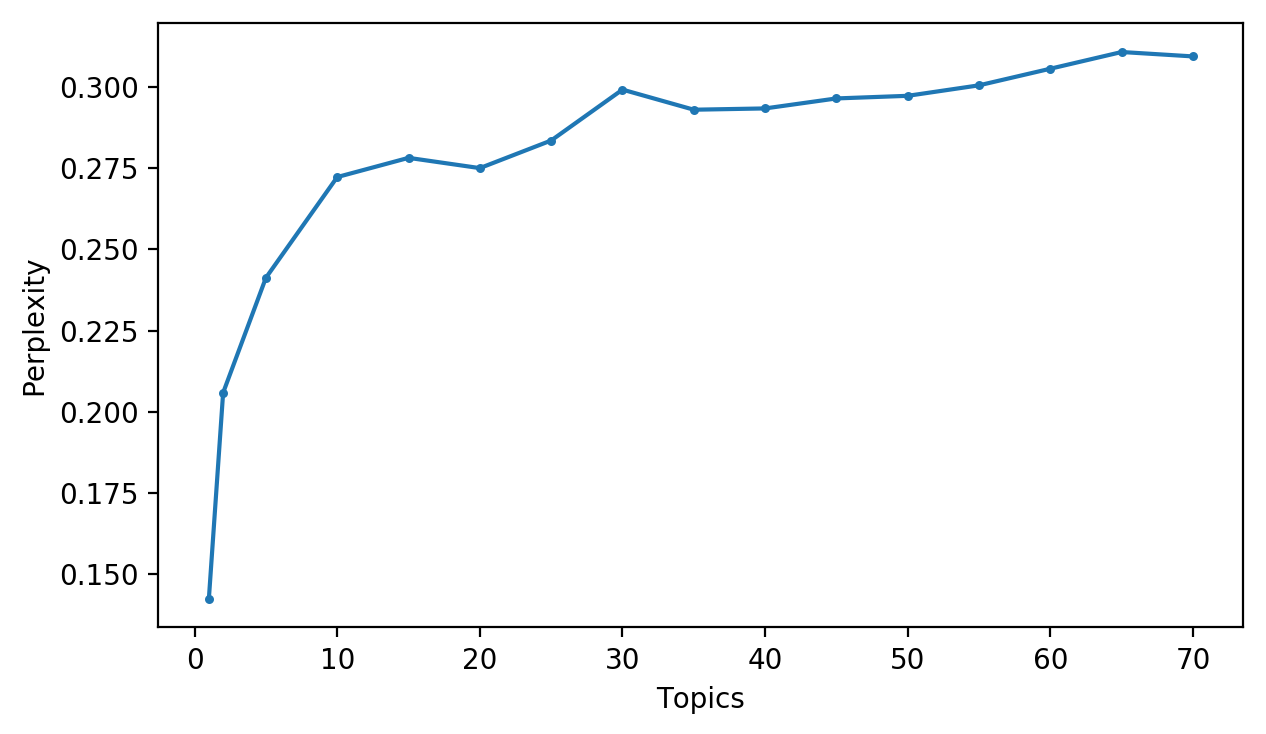

In [6]:
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

x = [s.K for s in stats]
y = [s.error for s in stats]

ax.plot(x,y)
ax.scatter(x,y,s=5)

ax.set_ylabel('Perplexity')
ax.set_xlabel('Topics')


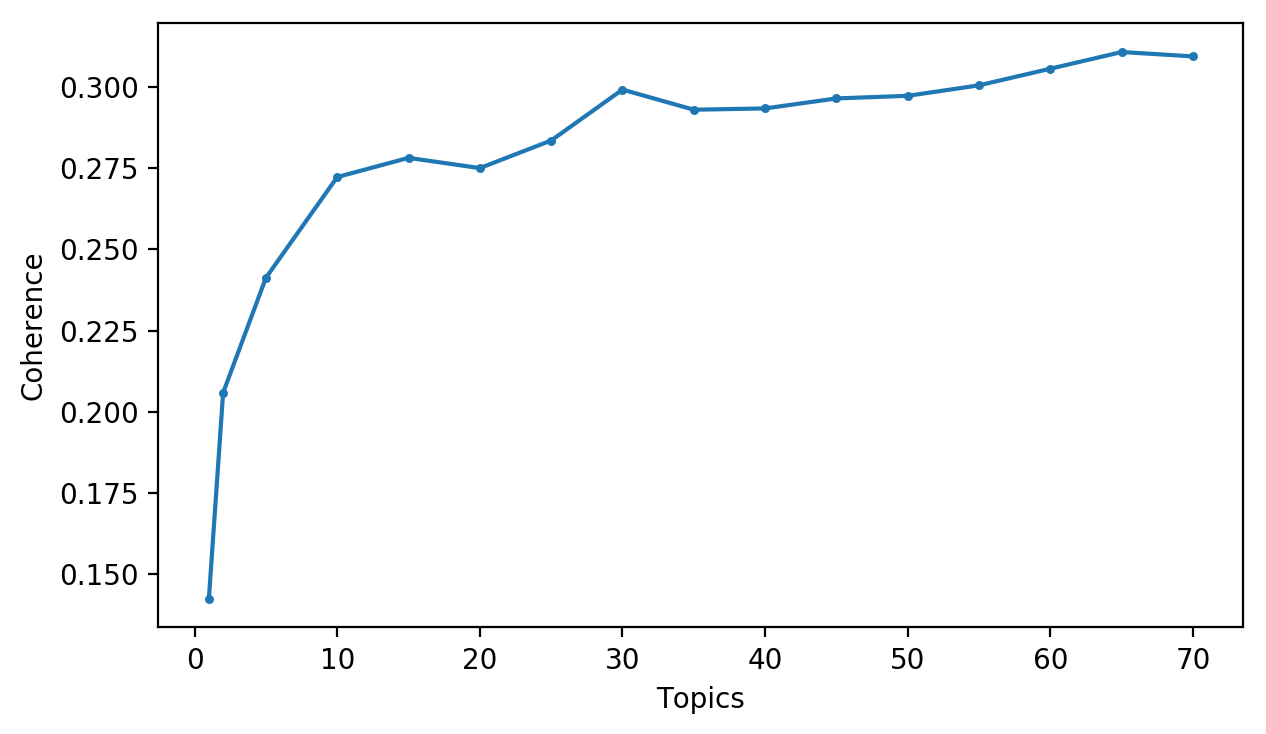

In [38]:
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

x = [s.K for s in stats]
y = [s.coherence for s in stats]

ax.plot(x,y)
ax.scatter(x,y,s=5)

ax.set_ylabel('Coherence')
ax.set_xlabel('Topics')


In [ ]:
query_id = 1615
stats = []
for k in [1,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70]:
    rs, created = RunStats.objects.get_or_create(
        min_freq=100,
        max_df=0.8,
        limit=s.limit,
        ngram=s.ngram,
        fancy_tokenization=False,
        K=k,
        method="LD",
        alpha=s.alpha,
        max_iter=s.max_iter,
        query_id=query_id,
        db=True,
        lda_learning_method="on",
        lda_library="ld"
    )
    print(k)
    if created:
        print("created")
    if s.pk != rs.pk:
        rs.save()
    if rs.status!=3:
        do_nmf(rs.pk)
        
    rs = RunStats.objects.get(pk=rs.pk)
    print(rs.error)
    stats.append(rs)

1
created

###############################    
## Doing NMF on query 1615 with 3481 documents and 1 topics



INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 20599 word types from a corpus of 614426 raw words and 3481 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 5807 unique words (28% of original 20599, drops 14792)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 590900 word corpus (96% of original 614426, drops 23526)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 20599 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 36 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 484164 word corpus (81.9% of prior 590900)
INFO:gensim.models.base_any2vec:estimated required memory for 5807 words and 100 dimensions: 7549100 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.models.base_any2vec:traini

Extracting tf-idf features for NMF...
done in 16.316s.


INFO:lda:n_documents: 3481
INFO:lda:vocab_size: 669
INFO:lda:n_words: 300683
INFO:lda:n_topics: 1
INFO:lda:n_iter: 100


Fitting the model with tf-idf features, n_samples=10 and n_features=100000000000...


/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -1854763
INFO:lda:<10> log likelihood: -1854763
INFO:lda:<20> log likelihood: -1854763
INFO:lda:<30> log likelihood: -1854763
INFO:lda:<40> log likelihood: -1854763
INFO:lda:<50> log likelihood: -1854763
INFO:lda:<60> log likelihood: -1854763
INFO:lda:<70> log likelihood: -1854763
INFO:lda:<80> log likelihood: -1854763
INFO:lda:<90> log likelihood: -1854763
INFO:lda:<99> log likelihood: -1854763


done in 11.333s.
Adding topicterms to db
done in 1.709s.
Adding DocTopics
0.48760366439819336
1.1836562156677246
done in 2.058s.
USING LDA LIBRARY
2074
RunStats object (2074)
2074
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
-1854762.72341541
2
created

###############################    
## Doing NMF on query 1615 with 3481 documents and 2 topics



INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 20599 word types from a corpus of 614426 raw words and 3481 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 5807 unique words (28% of original 20599, drops 14792)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 590900 word corpus (96% of original 614426, drops 23526)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 20599 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 36 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 484164 word corpus (81.9% of prior 590900)
INFO:gensim.models.base_any2vec:estimated required memory for 5807 words and 100 dimensions: 7549100 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.models.base_any2vec:traini

Extracting tf-idf features for NMF...
done in 16.386s.


INFO:lda:n_documents: 3481
INFO:lda:vocab_size: 669
INFO:lda:n_words: 300683
INFO:lda:n_topics: 2
INFO:lda:n_iter: 100


Fitting the model with tf-idf features, n_samples=10 and n_features=100000000000...


/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -2073789
INFO:lda:<10> log likelihood: -1990691
INFO:lda:<20> log likelihood: -1920783
INFO:lda:<30> log likelihood: -1919127
INFO:lda:<40> log likelihood: -1918541
INFO:lda:<50> log likelihood: -1918169
INFO:lda:<60> log likelihood: -1918013
INFO:lda:<70> log likelihood: -1918099
INFO:lda:<80> log likelihood: -1917848
INFO:lda:<90> log likelihood: -1918185
INFO:lda:<99> log likelihood: -1917516


done in 17.859s.
Adding topicterms to db
done in 0.748s.
Adding DocTopics
0.6051318645477295
1.1202478408813477
done in 2.129s.
USING LDA LIBRARY
2075
RunStats object (2075)
2075
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
-1917516.49902403
5
created

###############################    
## Doing NMF on query 1615 with 3481 documents and 5 topics



INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 20599 word types from a corpus of 614426 raw words and 3481 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 5807 unique words (28% of original 20599, drops 14792)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 590900 word corpus (96% of original 614426, drops 23526)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 20599 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 36 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 484164 word corpus (81.9% of prior 590900)
INFO:gensim.models.base_any2vec:estimated required memory for 5807 words and 100 dimensions: 7549100 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.models.base_any2vec:traini

Extracting tf-idf features for NMF...
done in 16.691s.


INFO:lda:n_documents: 3481
INFO:lda:vocab_size: 669
INFO:lda:n_words: 300683
INFO:lda:n_topics: 5
INFO:lda:n_iter: 100


Fitting the model with tf-idf features, n_samples=10 and n_features=100000000000...


/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -2373527
INFO:lda:<10> log likelihood: -2123052
INFO:lda:<20> log likelihood: -2001651
INFO:lda:<30> log likelihood: -1989099
INFO:lda:<40> log likelihood: -1985146
INFO:lda:<50> log likelihood: -1982186
INFO:lda:<60> log likelihood: -1980231
INFO:lda:<70> log likelihood: -1977274
INFO:lda:<80> log likelihood: -1976793
INFO:lda:<90> log likelihood: -1976240
INFO:lda:<99> log likelihood: -1976455


done in 19.529s.
Adding topicterms to db
done in 1.045s.
Adding DocTopics
1.9450418949127197
2.1937267780303955
done in 4.552s.
USING LDA LIBRARY
2076
RunStats object (2076)
2076
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
No topics in period!
-1976455.28942109
10
created

###############################    
## Doing NMF on query 1615 with 3481 documents and 10 topics



INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 20599 word types from a corpus of 614426 raw words and 3481 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 5807 unique words (28% of original 20599, drops 14792)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 590900 word corpus (96% of original 614426, drops 23526)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 20599 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 36 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 484164 word corpus (81.9% of prior 590900)
INFO:gensim.models.base_any2vec:estimated required memory for 5807 words and 100 dimensions: 7549100 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.models.base_any2vec:traini

Extracting tf-idf features for NMF...


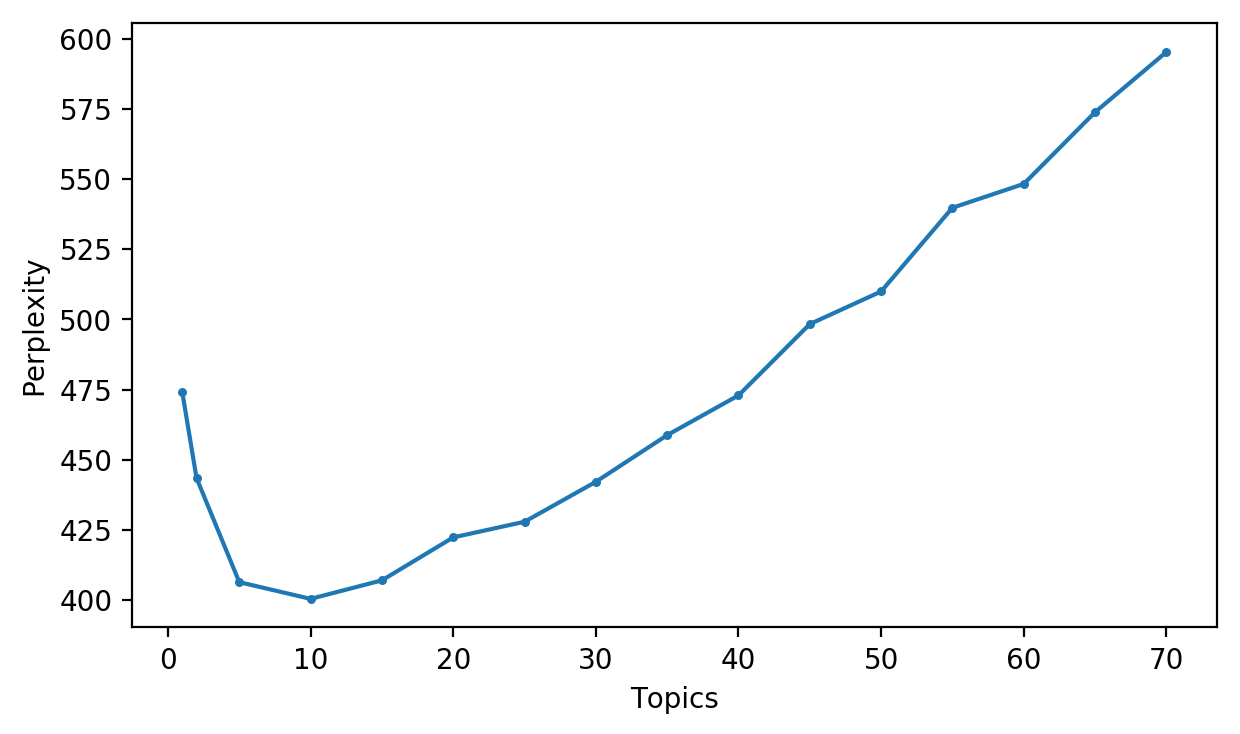

In [12]:
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

x = [s.K for s in stats]
y = [s.error for s in stats]

ax.plot(x,y)
ax.scatter(x,y,s=5)

ax.set_ylabel('Perplexity')
ax.set_xlabel('Topics')


In [6]:
rs.lda_library == RunStats.LDA_LIB

False

In [7]:
RunStats.LDA

'LD'